In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
from numpy import asarray 
import pandas as pd
import torchvision
from torchvision import transforms
import os

In [ ]:
# random forest

from sklearn.externals import joblib
rf_model = joblib.load('/content/gdrive/My Drive/riskmap_urop_data/rf_model_binary.pkl')
print(rf_model)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.22.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
# cnn

from keras.models import load_model
cnn_model = load_model('/content/gdrive/My Drive/riskmap_urop/cnnmodel.hdf5')
print(cnn_model)

In [ ]:
# test images

from keras.preprocessing.image import img_to_array, load_img
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
from matplotlib.pyplot import imshow
%matplotlib inline

# rf testing

def process_image1(image):
  """
  Takes in image. Returns padded numpy array. 
  """
  PIL_image = image[0] # get PIL Image only
  PIL_image.thumbnail((200,200)) # resize PIL image
  np_array = np.array(PIL_image) # convert to numpy array
  return np_array

def process_image2(np_array):
  """
  Takes in image. Returns padded numpy array. 
  """
  result = np.zeros((200, 200, 3))
  result[:np_array.shape[0],:np_array.shape[1]] = np_array
  # result currently holds the padded image
  return result

# cnn testing

cnn_results = []

def img_show(img):

  img = load_img(img)
  imgplot = plt.imshow(img)
  plt.show()

def img_prediction(img):

  img = load_img(img)
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  
  img = tf.cast(img, tf.float32)
  img = (img/127.5) - 1
  img = tf.image.resize(img, [256, 256])

  pred = cnn_model.predict(img)
  cnn_results.append(pred)
 
  damage_dict = {}
  damage_dict['No damage'] = pred[0][0]
  damage_dict['Mild damage'] = pred[0][1]
  damage_dict['Severe damage'] = pred[0][2]

  for key, value in damage_dict.items():
    print(key, ": ", value)
  print("Classification: ", max(damage_dict, key = damage_dict.get))

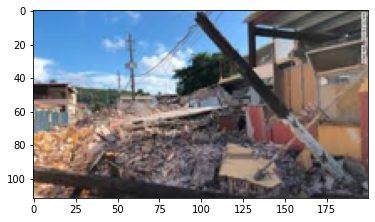

Classification: ['some']
None: 0.10045977011494253
Some: 0.8995402298850574


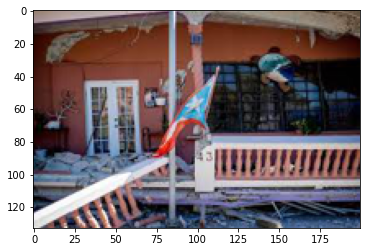

Classification: ['some']
None: 0.15277777777777776
Some: 0.8472222222222222


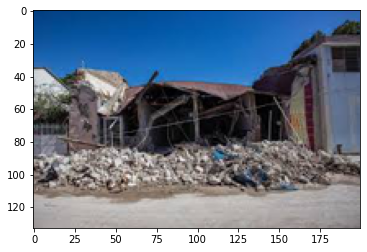

Classification: ['some']
None: 0.345
Some: 0.6549999999999999


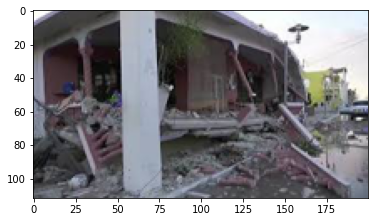

Classification: ['some']
None: 0.08222222222222222
Some: 0.9177777777777778


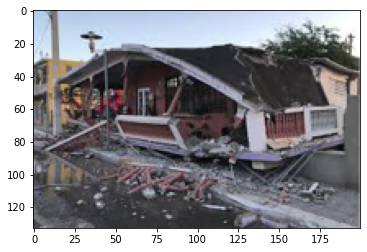

Classification: ['some']
None: 0.07256235827664398
Some: 0.9274376417233561


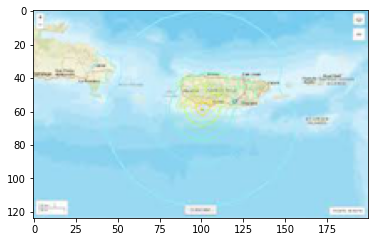

Classification: ['none']
None: 0.5627777777777777
Some: 0.4372222222222221


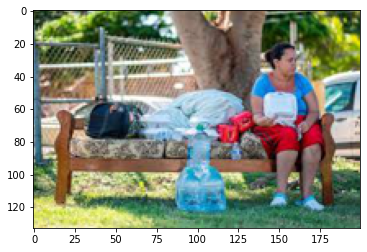

Classification: ['some']
None: 0.3844444444444444
Some: 0.6155555555555556


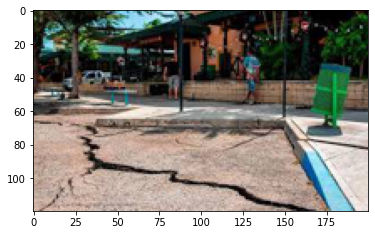

Classification: ['some']
None: 0.4272222222222222
Some: 0.5727777777777778


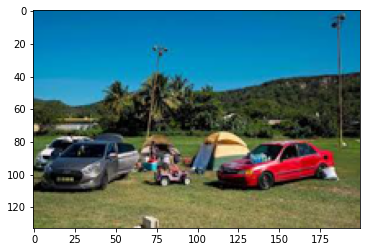

Classification: ['some']
None: 0.43833333333333335
Some: 0.5616666666666668


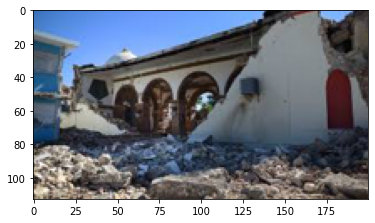

Classification: ['some']
None: 0.06422902494331066
Some: 0.9357709750566894


In [ ]:
# get rf results

rf_results = []

images = []

# pr_path = "/home/ubuntu/disaster_data/puerto_rico_folder"
pr_path = '/content/gdrive/My Drive/riskmap_urop_data/puerto_rico'
all_pr = torchvision.datasets.ImageFolder(root = pr_path)

for i in range(len(all_pr)):
  image = all_pr[i]
  PIL_image = process_image1(image)
  imgplot = plt.imshow(PIL_image)
  plt.show()
  result = process_image2(PIL_image).flatten()
  proba = rf_model.predict_proba([result])
  print("Classification:", rf_model.predict([result]))
  print("None:", proba[0][0])
  print("Some:", proba[0][1])
  rf_results.append(proba)

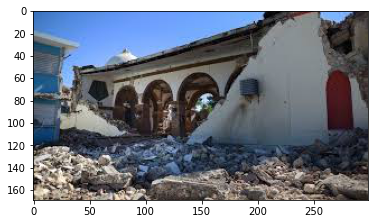

No damage :  0.53944767
Mild damage :  0.079654925
Severe damage :  0.38089737
Classification:  No damage


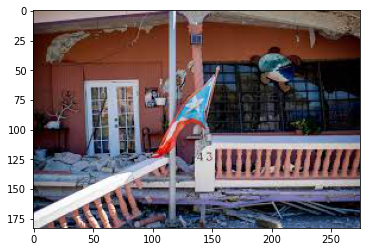

No damage :  0.99450266
Mild damage :  0.001280621
Severe damage :  0.004216708
Classification:  No damage


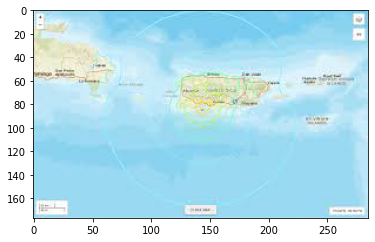

No damage :  0.49386987
Mild damage :  0.451313
Severe damage :  0.054817155
Classification:  No damage


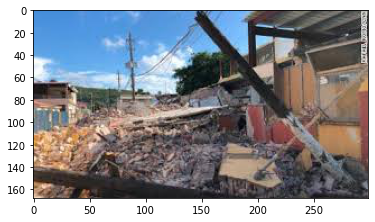

No damage :  0.006659683
Mild damage :  0.07263382
Severe damage :  0.92070657
Classification:  Severe damage


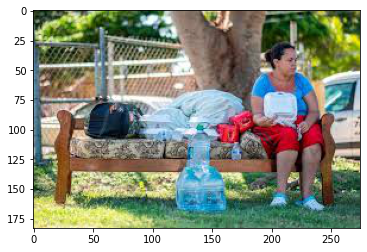

No damage :  0.58601046
Mild damage :  0.376299
Severe damage :  0.037690524
Classification:  No damage


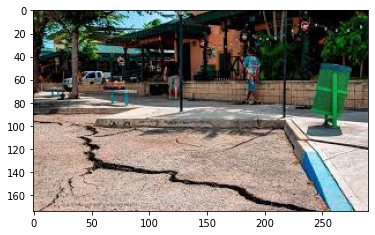

No damage :  0.08031017
Mild damage :  0.52961236
Severe damage :  0.39007735
Classification:  Mild damage


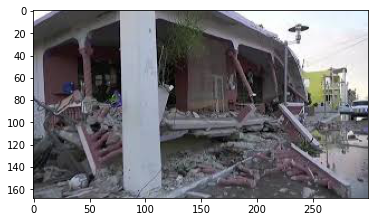

No damage :  0.013371008
Mild damage :  0.03170296
Severe damage :  0.9549261
Classification:  Severe damage


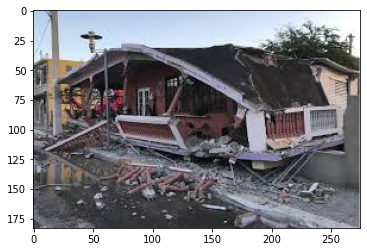

No damage :  0.005407918
Mild damage :  0.005432064
Severe damage :  0.98916
Classification:  Severe damage


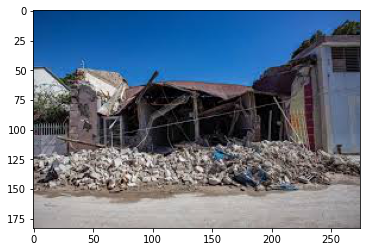

No damage :  0.018602787
Mild damage :  0.09683284
Severe damage :  0.8845644
Classification:  Severe damage


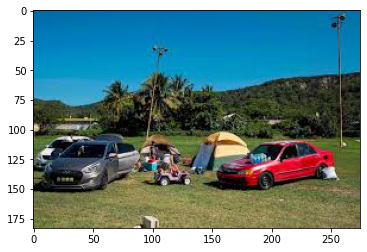

No damage :  0.6210859
Mild damage :  0.35914087
Severe damage :  0.019773176
Classification:  No damage


In [ ]:
# get cnn results
 
!unzip -uq '/content/gdrive/My Drive/riskmap_urop/puerto_rico_test'
path = os.path.expanduser('puerto_rico_test/')

import glob
images = glob.glob(path + '/*.jpg')

for img in images:
  img_show(img)
  img_prediction(img)

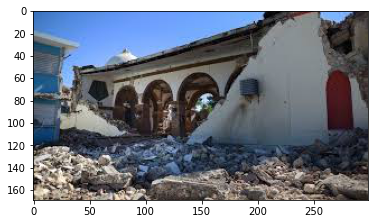

Classification: severe
None: 0.2660089511432867 0.10045977011494253 0.53944767
Mild: 0.3876953155540529 0.8995402298850574 0.079654925
Severe: 0.6021290641269464 0.8995402298850574 0.38089737


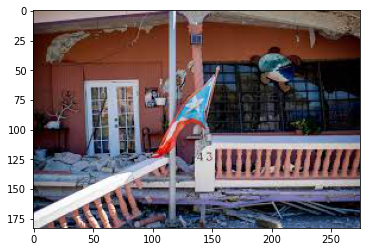

Classification: none
None: 0.4741899543338352 0.15277777777777776 0.99450266
Mild: 0.33933710625408114 0.8472222222222222 0.001280621
Severe: 0.42529779422200387 0.8472222222222222 0.004216708


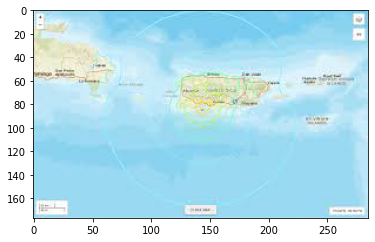

Classification: mild
None: 0.3700479483604431 0.345 0.49386987
Mild: 0.41995954614877695 0.6549999999999999 0.451313
Severe: 0.34942686200141904 0.6549999999999999 0.054817155


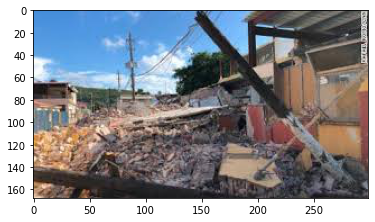

Classification: severe
None: 0.04377498424715466 0.08222222222222222 0.006659683
Mild: 0.39253294733828975 0.9177777777777778 0.07263382
Severe: 0.8271715169482761 0.9177777777777778 0.92070657


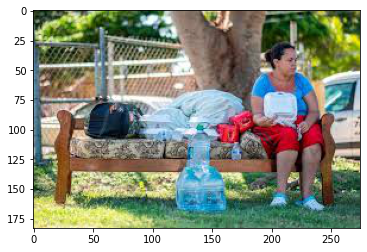

Classification: mild
None: 0.270685361572404 0.07256235827664398 0.58601046
Mild: 0.5026797045284118 0.9274376417233561 0.376299
Severe: 0.4787950304664182 0.9274376417233561 0.037690524


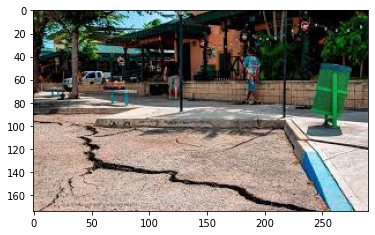

Classification: none
None: 0.31351295822196534 0.5627777777777777 0.08031017
Mild: 0.3602532157235675 0.4372222222222221 0.52961236
Severe: 0.37464205212063256 0.4372222222222221 0.39007735


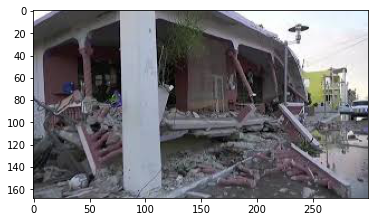

Classification: severe
None: 0.19757062560154331 0.3844444444444444 0.013371008
Mild: 0.25731825884266035 0.6155555555555556 0.03170296
Severe: 0.689748207198249 0.6155555555555556 0.9549261


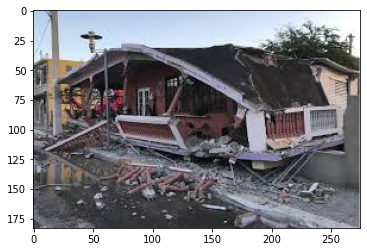

Classification: severe
None: 0.21577427822268672 0.4272222222222222 0.005407918
Mild: 0.23101233357387702 0.5727777777777778 0.005432064
Severe: 0.6820528894000584 0.5727777777777778 0.98916


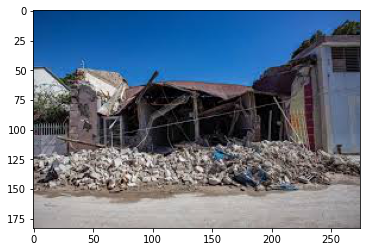

Classification: severe
None: 0.2266077813009421 0.43833333333333335 0.018602787
Mild: 0.25855816123882935 0.5616666666666668 0.09683284
Severe: 0.6346590932210288 0.5616666666666668 0.8845644


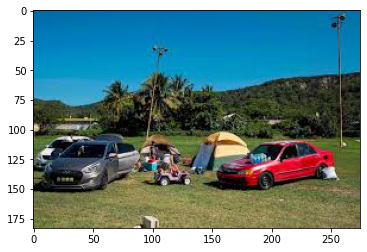

Classification: mild
None: 0.2805488653464112 0.06422902494331066 0.6210859
Mild: 0.5000076955570386 0.9357709750566894 0.35914087
Severe: 0.4757947579043117 0.9357709750566894 0.019773176


In [ ]:
# num_images = len(rf_results)
i = 0
rf_none_weight = 1
rf_mild_weight = 0.8
rf_severe_weight = 1
cnn_none_weight = 0.8
cnn_mild_weight = 0.7
cnn_severe_weight = 0.8

# if rf determines it's none, it is automatically none
# otherwise, mix percantages (can be any category)

for img in images:
  img_show(img)
  rfr = rf_results[i]
  cnr = cnn_results[i]
  
  none = (rfr[0][0]*rf_none_weight + cnr[0][0]*cnn_none_weight)/2
  mild = (rfr[0][1]*rf_mild_weight + cnr[0][1]*cnn_mild_weight)/2
  severe = (rfr[0][1]*rf_severe_weight + cnr[0][2]*cnn_severe_weight)/2

  if none > mild and none > severe:
    result = "none"
  elif mild > severe:
    result = "mild"
  else: 
    result = "severe"

  # if rf determines it's none, it is automatically none
  if rfr[0][0] > rfr[0][1]:
    result = "none"
  print("Classification:", result)
  print("None:", none, rfr[0][0], cnr[0][0])
  print("Mild:", mild, rfr[0][1], cnr[0][1])
  print("Severe:", severe, rfr[0][1], cnr[0][2])
  i += 1